In [109]:
# Import libraries

import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plotly.express as px


In [74]:
# Load raw data from scraping

tweets_clean = pd.read_csv('../data/tweets_clean.csv')
tweets_clean.head()

,name,user,date,category,id,content,lang,sourceLabel,inReplyToTweetId,inReplyToUser,mentionedUsers,hashtags,replyCount,retweetCount,likeCount,quoteCount
0,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 17:22:12+00:00,Tech CEO,1.598004e+18,@EvaFoxU @Reuters Exactly. The obvious reality...,en,Twitter for iPhone,1.597924e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,2565.0,9638.0,41337.0,1205.0
1,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 15:54:33+00:00,Tech CEO,1.597982e+18,Update from @Neuralink at 6pm PT,en,Twitter for iPhone,NaN,NaN,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,6211.0,6405.0,71890.0,842.0
2,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 09:39:14+00:00,Tech CEO,1.597888e+18,@NorthmanTrader @vincent13031925 Exactly,en,Twitter for iPhone,1.597881e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,569.0,257.0,5336.0,25.0
3,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 09:03:04+00:00,Tech CEO,1.597879e+18,@vincent13031925 Trend is concerning. Fed need...,en,Twitter for iPhone,1.597706e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,7455.0,10295.0,93386.0,1163.0
4,Elon Musk,"{'_type': 'snscrape.modules.twitter.User', 'us...",2022-11-30 08:40:11+00:00,Tech CEO,1.597873e+18,"@teslaownersSV Much more, but I am simply stat...",en,Twitter for iPhone,1.597871e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,646.0,690.0,9893.0,40.0


In [75]:
# Agg Category

tweets_agg = tweets_clean.groupby('category').agg({'name': 'nunique',
                                                   'id': 'count',                                                    
                                                   'replyCount': ['sum', 'mean'],
                                                   'retweetCount': ['sum', 'mean'],
                                                   'likeCount': ['sum', 'mean'],
                                                   'quoteCount': ['sum', 'mean']
                                                  })

tweets_agg.columns = tweets_agg.columns.droplevel()
tweets_agg.columns = ['Users_Analysed', 'Total_Tweets',
                      'Total_Replies', 'Mean_Replies', 
                      'Total_Retweets', 'Mean_Retweets',
                      'Total_Likes', 'Mean_Likes',
                      'Total_Quotes', 'Mean_Quotes']

tweets_agg.reset_index(inplace=True)
tweets_agg

,category,Users_Analysed,Total_Tweets,Total_Replies,Mean_Replies,Total_Retweets,Mean_Retweets,Total_Likes,Mean_Likes,Total_Quotes,Mean_Quotes
0,Celebrities,6,2189,955056.0,436.297853,3443159.0,1572.936958,38704107.0,17681.181818,826482.0,377.561444
1,Politician,6,8332,18735917.0,2248.669827,36906808.0,4429.525684,225957708.0,27119.264042,3101661.0,372.258881
2,Tech CEO,6,4917,22778956.0,4632.693919,28358924.0,5767.525727,342743168.0,69705.749034,5206771.0,1058.932479


In [90]:
#Agg Source
source_dict = {'Twitter for iPhone': 'Iphone', 
               'Twitter for iPad': 'Other',
               'Twitter for Android': 'Android',
               'Twitter for Mac': 'Other',
               'Twitter Web App': 'Web App',
               'Twitter Media Studio': 'Media Studio',
               'Twitter Media Studio - LiveCut': 'Media Studio',
               'The White House': 'The White House',
               'TweetDeck': 'Other', 
               'Periscope': 'Periscope',
               'Arrow.': 'Other'}

tweets_source = tweets_clean.replace(source_dict).groupby('sourceLabel').agg({'id': 'count'}).reset_index()
tweets_source.rename({'id': 'Tweets'}, axis=1, inplace=True)
tweets_source

,sourceLabel,Tweets
0,Android,66
1,Iphone,8808
2,Media Studio,2596
3,Other,27
4,Periscope,149
5,The White House,2142
6,Web App,1650


In [106]:
# Agg Category & Source
source_dict = {'Twitter for iPhone': 'Iphone', 
               'Twitter for iPad': 'iPad',
               'Twitter for Android': 'Android',
               'Twitter for Mac': 'Mac',
               'Twitter Web App': 'Web App',
               'Twitter Media Studio': 'Media Studio',
               'Twitter Media Studio - LiveCut': 'Media Studio',
               'The White House': 'The White House',
               'TweetDeck': 'TweetDeck', 
               'Periscope': 'Periscope',
               'Arrow.': 'Arrow'}

tweets_cns = tweets_clean.replace(source_dict).groupby(['category', 'sourceLabel']).agg({'id': 'count' }).reset_index()
tweets_cns.rename({'sourceLabel': 'Device', 'id': 'Tweets'}, axis=1, inplace=True)
cns_df = tweets_cns.fillna(0)
cns_df

,category,Device,Tweets
0,Celebrities,Arrow,1
1,Celebrities,Iphone,1348
2,Celebrities,Mac,1
3,Celebrities,Media Studio,709
4,Celebrities,Web App,130
5,Politician,Iphone,3161
6,Politician,Media Studio,1849
7,Politician,Periscope,149
8,Politician,The White House,2142
9,Politician,TweetDeck,1


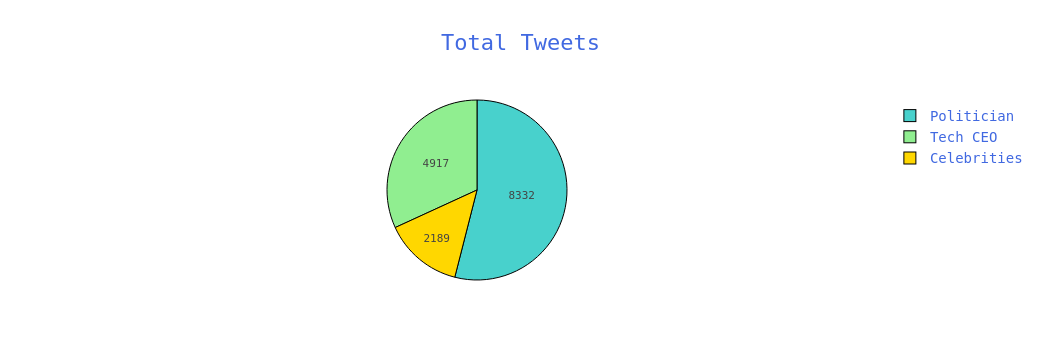

In [32]:
# Pie Chart - Total Tweets

cat_tweets = go.Figure(go.Pie(labels=tweets_agg['category'], values=tweets_agg['Total_Tweets']))

cat_tweets.update_traces(hoverinfo='label+percent+value',
                              hovertemplate='<extra></extra>'+
                              '%{label}<br>'+
                              '<br>Tweets: %{value:.0f}'+
                              '<br>%Total: %{percent}',
                              textinfo='text+value', textfont_size=11,
                              marker=dict(colors=['gold', 'mediumturquoise',  'lightgreen'], 
                                          line=dict(color='#000000', width=1))
                             )

cat_tweets.update_layout(title="Total Tweets", 
                              title_font_size = 22,
                              title_x = 0.5,
                              title_xanchor = 'center',
                              #legend_title="Category",
                              font=dict(family="Comic, monospace",
                                        size=14,
                                        color="RoyalBlue")
                             )

cat_tweets.show()

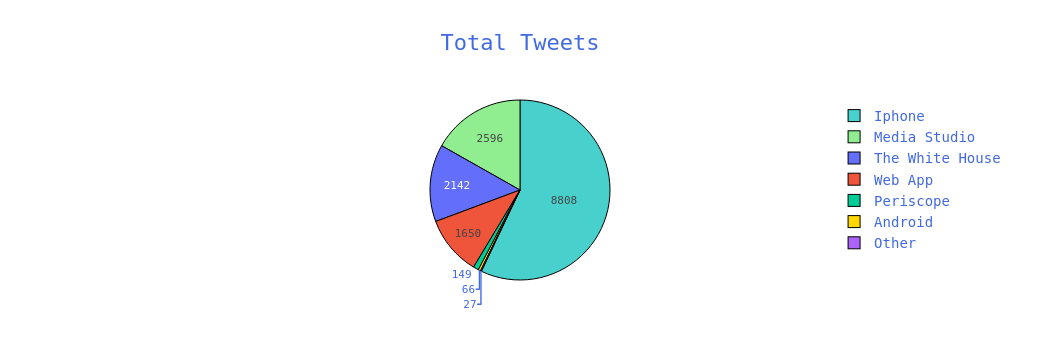

In [91]:
# Pie Chart - Device Distribution

cat_tweets = go.Figure(go.Pie(labels=tweets_source['sourceLabel'], values=tweets_source['Tweets']))

cat_tweets.update_traces(hoverinfo='label+percent+value',
                              hovertemplate='<extra></extra>'+
                              '%{label}<br>'+
                              '<br>Tweets: %{value:.0f}'+
                              '<br>%Total: %{percent}',
                              textinfo='text+value', textfont_size=11,
                              marker=dict(colors=['gold', 'mediumturquoise',  'lightgreen'], 
                                          line=dict(color='#000000', width=1))
                             )

cat_tweets.update_layout(title="Total Tweets", 
                              title_font_size = 22,
                              title_x = 0.5,
                              title_xanchor = 'center',
                              #legend_title="Category",
                              font=dict(family="Comic, monospace",
                                        size=14,
                                        color="RoyalBlue")
                             )

cat_tweets.show()

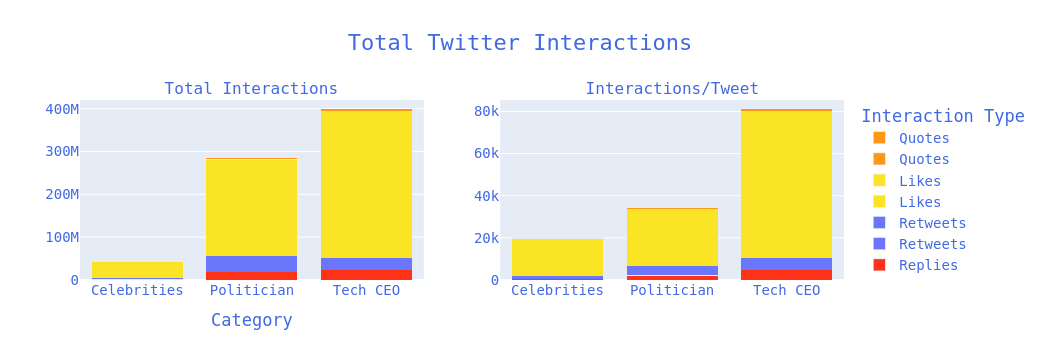

In [71]:
# Bar charts: Interactions

# Create subplot grid

cat_interactions = make_subplots(rows=1, cols=2,subplot_titles=("Total Interactions", "Interactions/Tweet"))
                                      #specs=[{"type": "bar"}, {"type": "bar"}],
                                      

# Add traces top left

#fig=go.Figure()
actions = ['Replies', 'Retweets', 'Likes', 'Quotes']
colors = ['#FD3216', '#6A76FC', '#FBE426', '#FF9616']#'#F6F926']
aggregators = ['Total','Mean']

for c, action in enumerate(actions):
    for i, agg in enumerate(aggregators):
        y_str = f'{agg}_{action}'
        cat_interactions.add_trace(go.Bar(name=action, 
                                          x=tweets_agg['category'], 
                                          y=tweets_agg[y_str],
                                          marker_color=colors[c]), row=1, col=i+1)
        cat_interactions.update_traces(#hovertemplate='<extra></extra>'+
                                       #'%{x}<br>'+
                                       #'<br>{action}:  %{y}',
                                       textfont_size=11,
                                       #title_xaxis="Category",
                              #marker=dict(colors=['gold', 'mediumturquoise',  'lightgreen'], 
                                          #line=dict(color='#000000', width=1))
                             )
               
cat_interactions.update_layout(barmode='stack',
                               title="Total Twitter Interactions", 
                               title_font_size = 22,
                               title_x = 0.5,
                               title_xanchor = 'center',
                               xaxis_title="Category",
                               legend_title="Interaction Type",
                               hovermode='x unified',
                               font=dict(family="Comic, monospace",
                                         size=14,
                                         color="RoyalBlue")
                              )
cat_interactions.show()

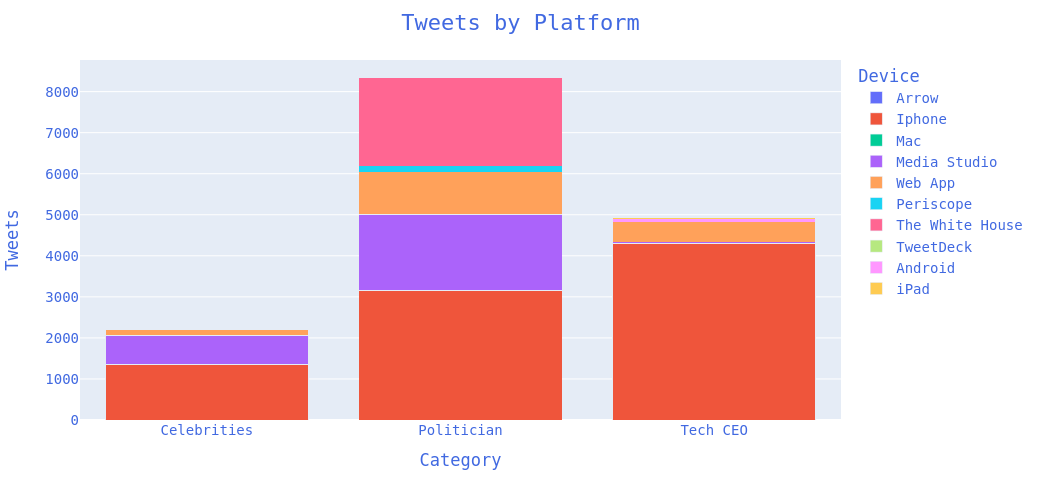

In [133]:
# Bar charts: Device usage


cat_platform = px.bar(cns_df, 
                    x = 'category',
                    y = 'Tweets', 
                    color = 'Device',
                    custom_data = ['Device'],
                    barmode = 'stack')

cat_platform.update_traces(hovertemplate='<extra></extra>'+
                                       '%{customdata[0]}:  %{y}',
                                       textfont_size=11,
                                       #title_xaxis="Category",
                              #marker=dict(colors=['gold', 'mediumturquoise',  'lightgreen'], 
                                          #line=dict(color='#000000', width=1))
                             )

cat_platform.update_layout(yaxis_title = 'Tweets', 
                         width = 800, height = 500,
                         title="Tweets by Platform", 
                         title_font_size = 22,
                         title_x = 0.5,
                         title_xanchor = 'center',
                         xaxis_title="Category",
                         legend_title="Device",
                         hovermode='x unified',
                         font=dict(family="Comic, monospace",
                                   size=14,
                                   color="RoyalBlue")
                        )

cat_platform.show()